# Sharad Kumar Tiwari
# Task-5 Business Analytics

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Asus/Downloads/SampleSuperstore.csv')
pd.set_option('display.max_columns',None)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [39]:
df.shape

(9977, 13)

In [3]:
df.duplicated().sum()

17

In [4]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [28]:
corr= df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


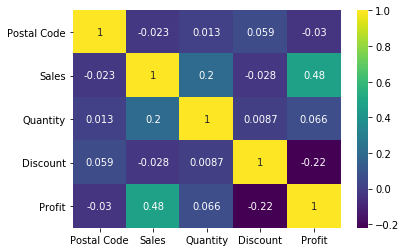

In [29]:
sns.heatmap(corr, cmap='viridis',annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

# Missing Values

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Numerical Features

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of Numerical Features :- ',len(numerical_features))
df[numerical_features].head()

Number of Numerical Features :-  5


,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


# Types of Numerical Features
1). Discrete 2). Continuous

# Discrete Features

In [10]:
# Discrete Features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
print('Number of Discrete Features : ',len(discrete_features))

Number of Discrete Features :  2


In [11]:
discrete_features

['Quantity', 'Discount']

The code didn't take Postal Code as Discrete Feature, So we will provide it by ourselves.

In [12]:
discrete_features.append('Postal Code')
discrete_features

['Quantity', 'Discount', 'Postal Code']

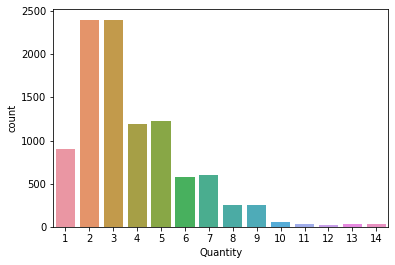

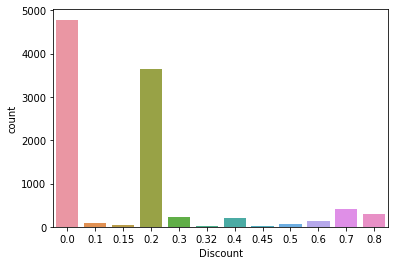

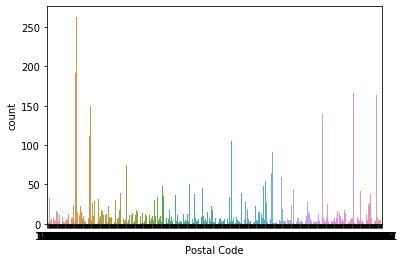

In [14]:
# Count the Unique variables
for feature in discrete_features:
    sns.countplot(x=feature, data=df)
    plt.show()

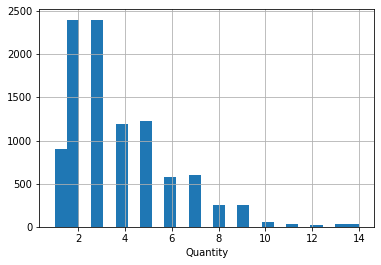

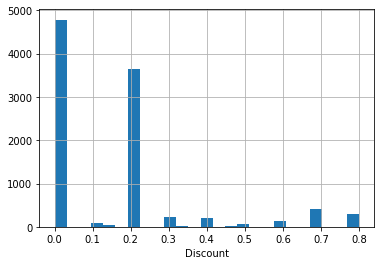

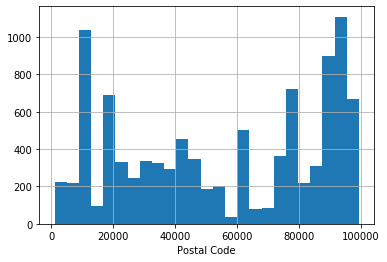

In [15]:
# Checking Distribution
for feature in discrete_features:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

The distribution of both features is right skewed

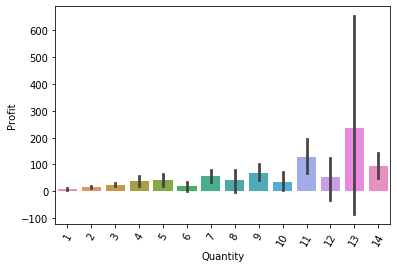

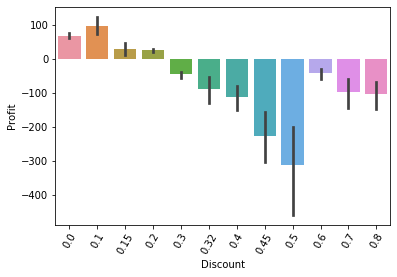

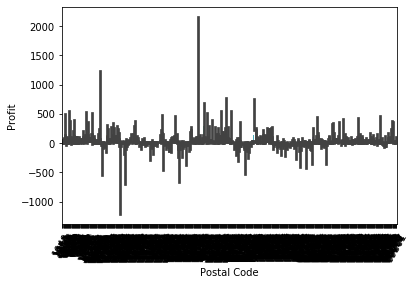

In [16]:
# Relation between Discrete Features and Profit

for feature in discrete_features:
    sns.barplot(x=feature,y='Profit',data=df)
    plt.xticks(rotation=60)
    plt.show()

The relation between Quantity and Profit is Positive relation, So if the quantity increases the profit also get increase.
As we can see the relation between Discount and Profit is negative, So with the increase in Discount the Profit get decrease.

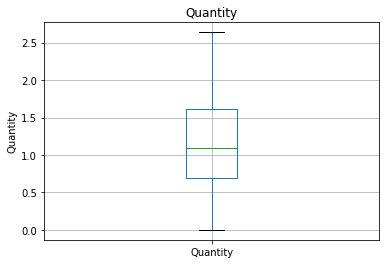

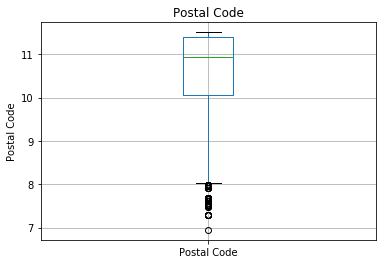

In [31]:
#  Outliers
for feature in discrete_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Continuous Features

In [17]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print('Number of Continuous Features : ',len(continuous_features))

Number of Continuous Features :  2


In [18]:
continuous_features

['Sales', 'Profit']

In [24]:
continuous_features.remove('Profit')
continuous_features

['Sales']

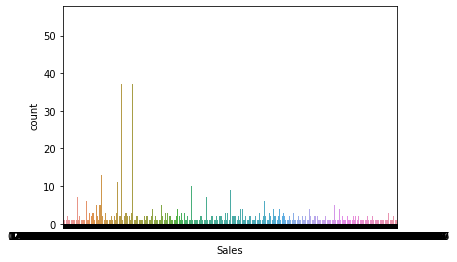

In [25]:
# Count the Unique Variables
for feature in continuous_features:
    sns.countplot(x=feature,data=df)
    plt.show()

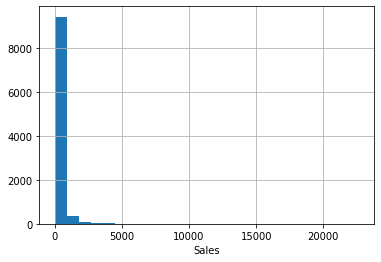

In [26]:
# Checking distribution
for feature in continuous_features:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

Here The distribution of Sales is right skewed.

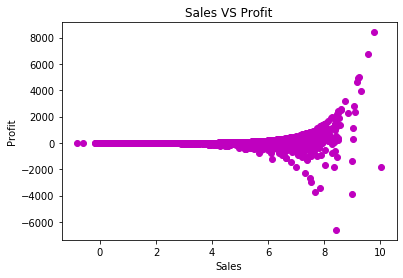

In [47]:
# Relation between Continuous Features and Profit
for feature in continuous_features:
    plt.scatter(x=df[feature],y=df['Profit'],c='m')
    plt.title('Sales VS Profit')
    plt.xlabel('Sales')
    plt.ylabel('Profit')

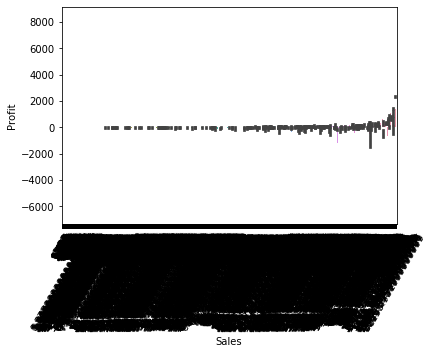

In [27]:
for feature in continuous_features:
    sns.barplot(x=feature,y='Profit',data=df)
    plt.xticks(rotation=60)
    plt.show()

According to the As the Sale increases the Profit also increases but somtimes the Profit decreases because of discount.

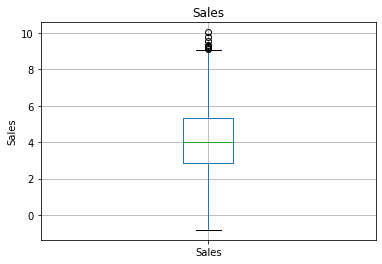

In [30]:
# Outliers

for feature in continuous_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical Variables

In [33]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of Categorical Features :- ',len(categorical_features))

Number of Categorical Features :-  8


In [35]:
df[categorical_features].head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [37]:
for feature in categorical_features:
    print(f'The feature is ({feature}) and the number of categories are ({len(df[feature].unique())})')

The feature is (Ship Mode) and the number of categories are (4)
The feature is (Segment) and the number of categories are (3)
The feature is (Country) and the number of categories are (1)
The feature is (City) and the number of categories are (531)
The feature is (State) and the number of categories are (49)
The feature is (Region) and the number of categories are (4)
The feature is (Category) and the number of categories are (3)
The feature is (Sub-Category) and the number of categories are (17)


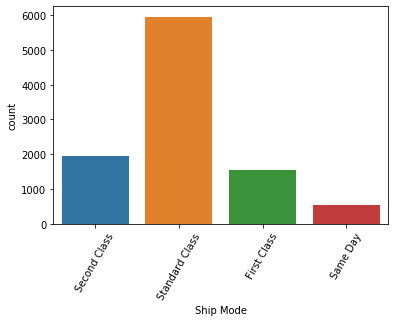

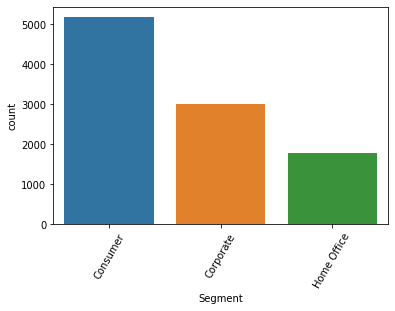

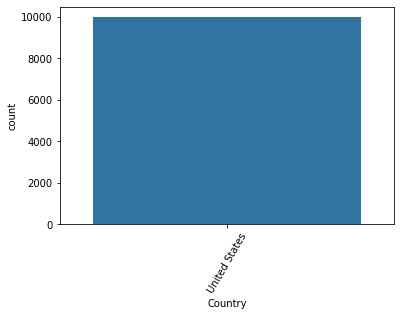

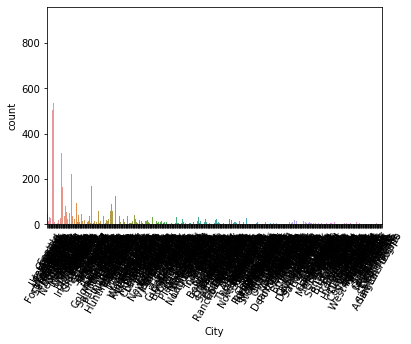

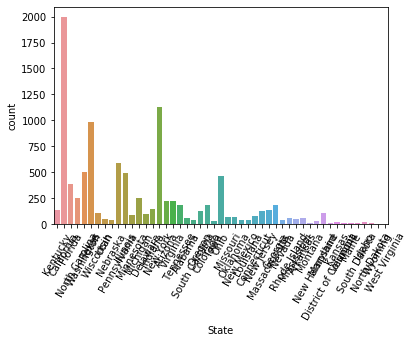

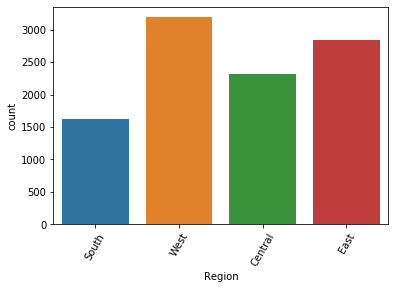

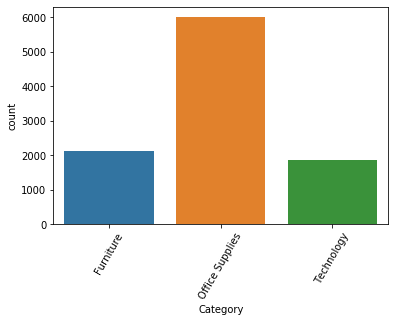

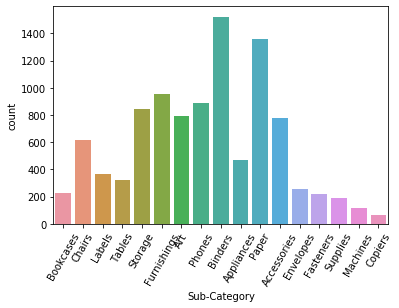

In [40]:
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.xticks(rotation=60)
    plt.show()

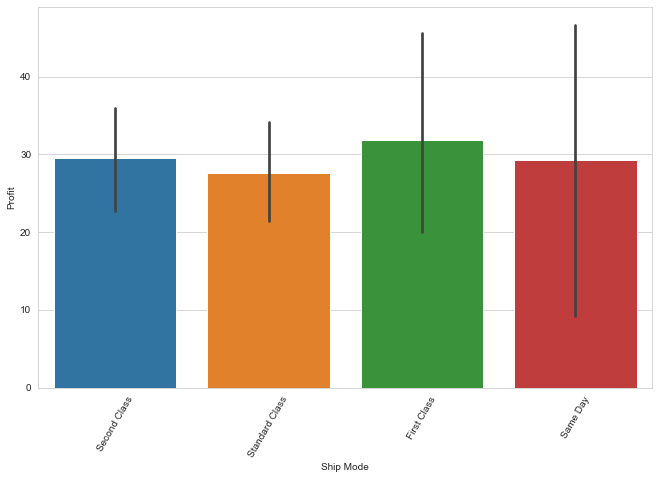

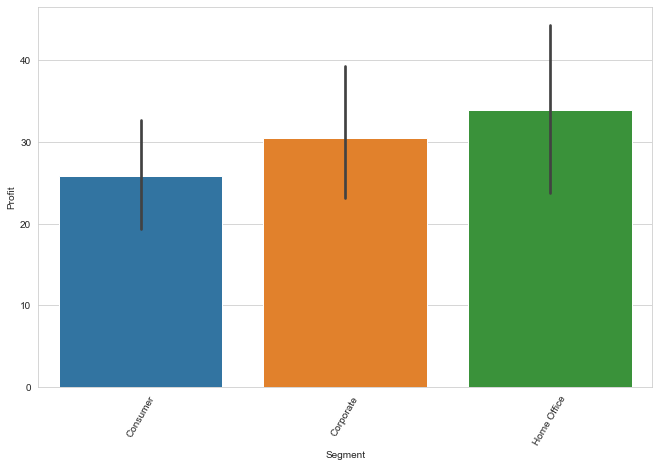

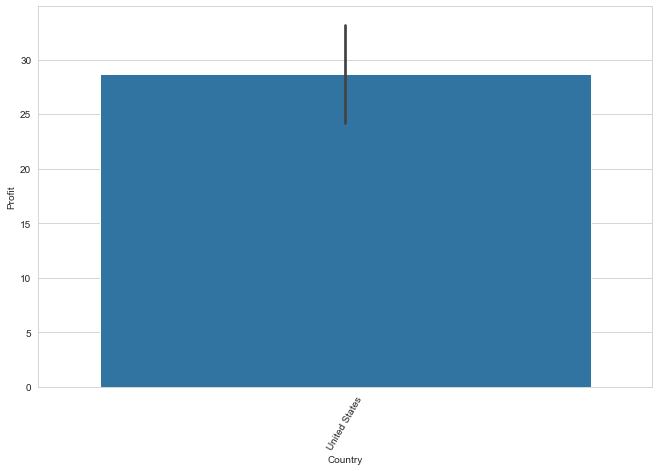

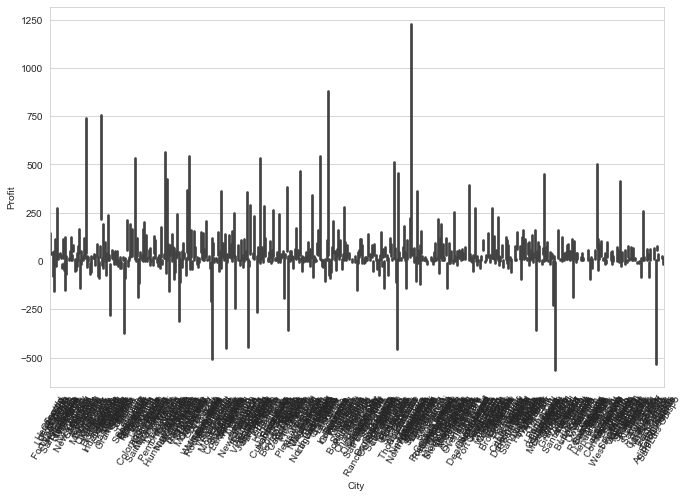

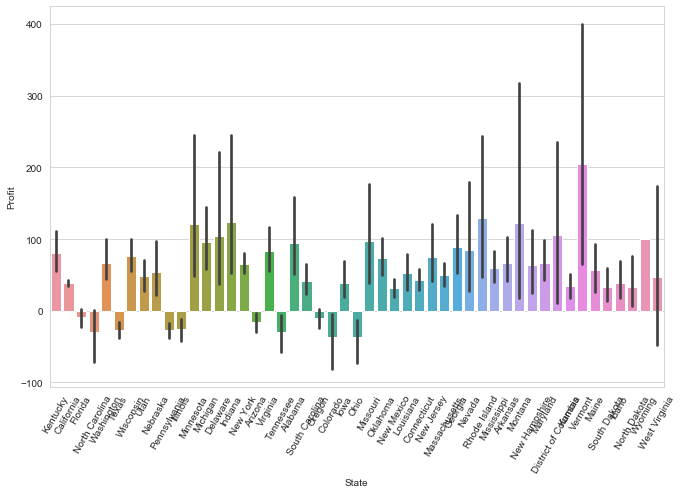

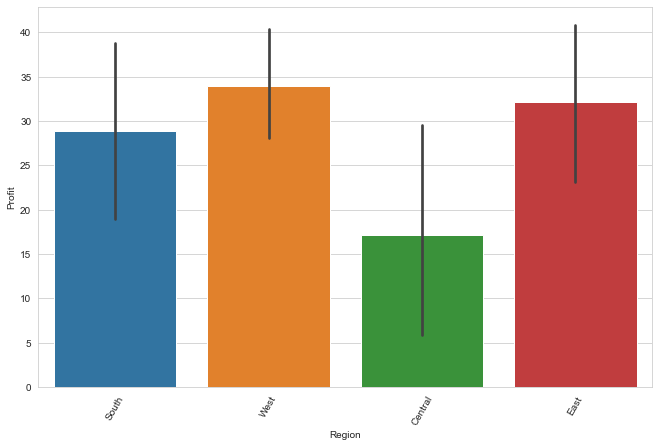

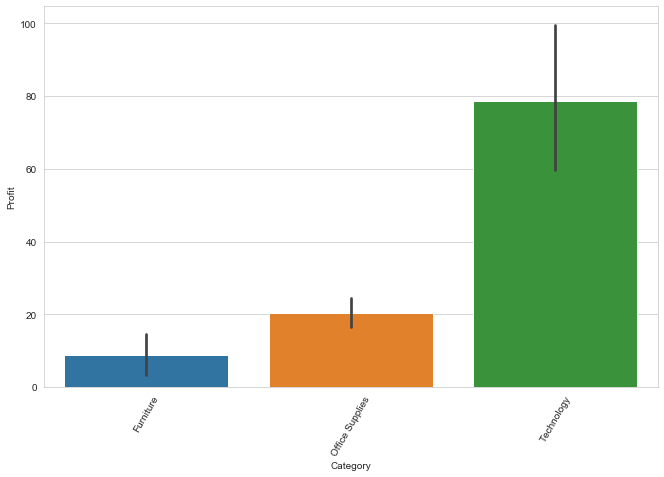

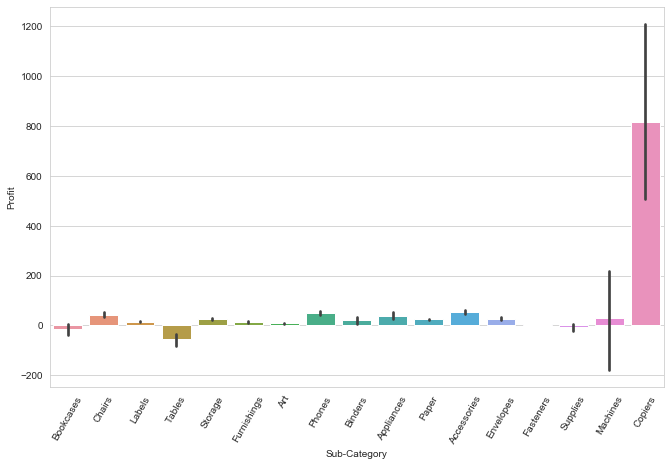

In [117]:
# Relation between Categorical Features and Profit
for feature in categorical_features:
    plt.figure(figsize=(11,7))
    sns.barplot(x=feature,y='Profit',data=df)
    plt.xticks(rotation=60)
    plt.show()

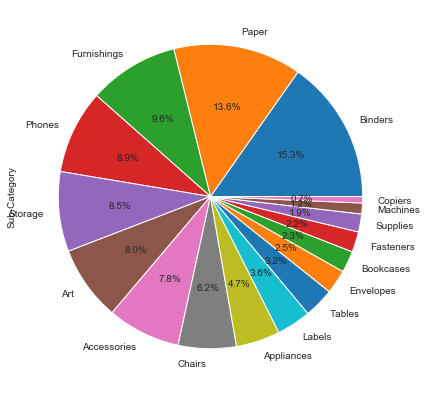

In [116]:
# Pieplot in subcategory
plt.figure(figsize=(11,7))
df["Sub-Category"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 792x504 with 0 Axes>

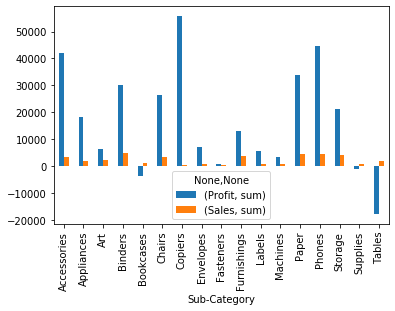

In [46]:
# total Profit and Sales in the basis of Sub-Category
plt.figure(figsize=(11,7))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

# Profit Vs Sales According To the Region

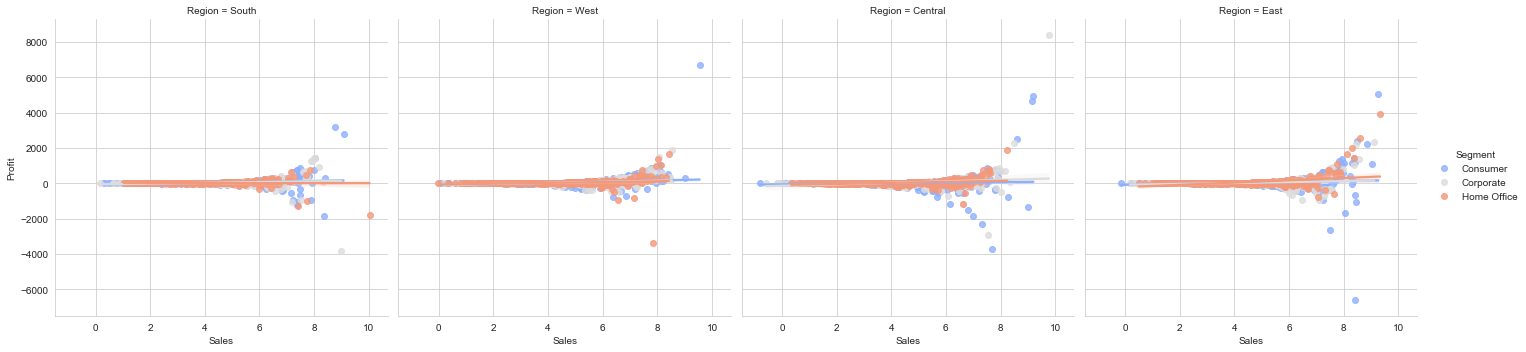

In [63]:
sns.set_style('whitegrid')
sns.lmplot(x='Sales',y='Profit',col='Region',data=df,hue='Segment',palette='coolwarm')

Here we can see the profit is highest in West region and then East region. In Central Region the Profit is increasing and Decreasing as well. 

# Quantity Wise Distribution of Categories

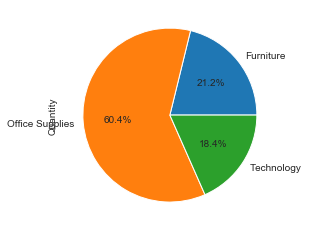

In [73]:
df.groupby('Category')['Quantity'].sum().plot.pie(autopct='%1.1f%%')
plt.show()

# Quantity wise distribution in Regions

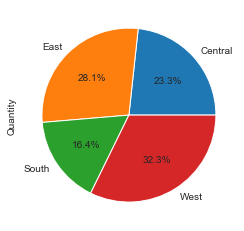

In [74]:
df.groupby('Region')['Quantity'].sum().plot.pie(autopct='%1.1f%%')
plt.show()

# Top profitable cities 

In [105]:
top_cities=df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top_cities

,City,Profit
329,New York City,62013.8973
266,Los Angeles,30431.4267
452,Seattle,29121.6825
438,San Francisco,17466.1186
123,Detroit,13146.6935
...,...,...
80,Chicago,-6648.3318
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10175.1755


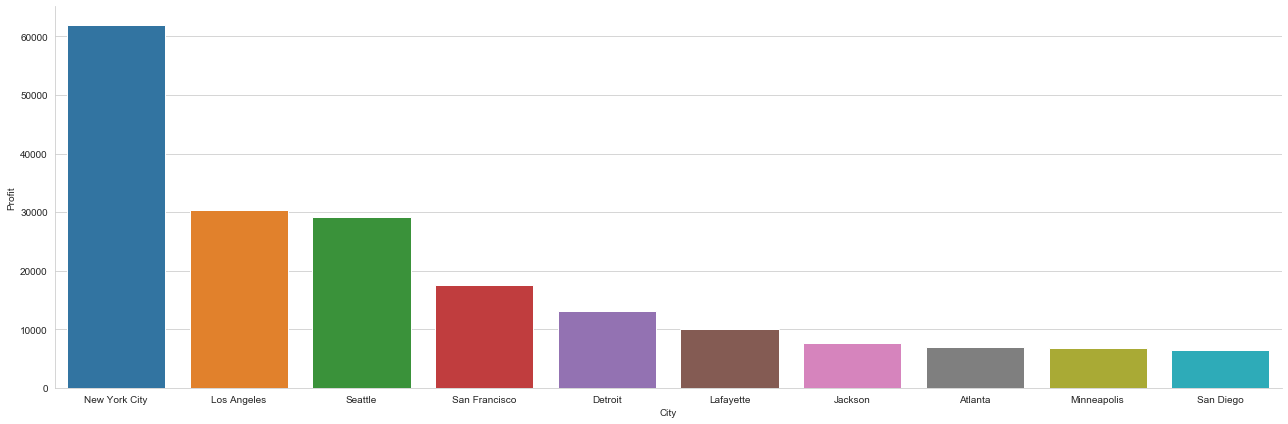

In [106]:
sns.catplot('City','Profit',data=top_cities.head(10),kind='bar',height=6,aspect=3)
plt.show()

# Top Profitable Sub-Category

In [108]:
top_sub_categories = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top_sub_categories

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,33944.2395
3,Binders,30228.0003
5,Chairs,26567.1278
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13052.7230
7,Envelopes,6964.1767


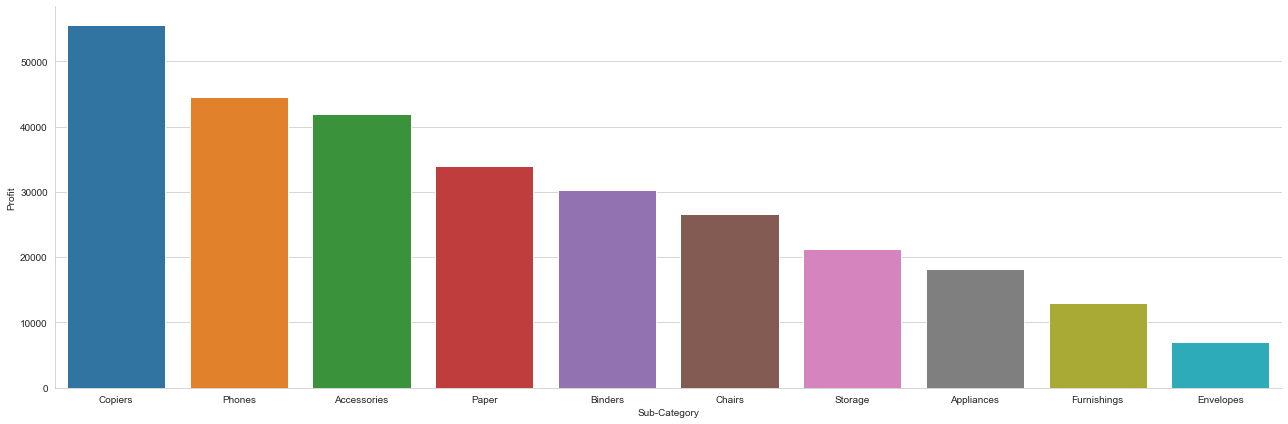

In [110]:
sns.catplot(x='Sub-Category',y='Profit',data=top_sub_categories.head(10),kind='bar',height=6,aspect=3)
plt.show()

# Quantity Wise distribution of Sub-Category

In [115]:
df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)

Sub-Category
Binders        1828.547812
Paper          1580.341571
Furnishings    1108.163379
Phones         1015.628203
Storage         971.800610
Art             928.170822
Accessories     914.363129
Chairs          721.579188
Appliances      538.258316
Labels          423.744773
Tables          371.507861
Envelopes       282.156196
Fasteners       277.858995
Bookcases       265.063720
Supplies        205.956292
Machines        137.240011
Copiers          74.025766
Name: Quantity, dtype: float64

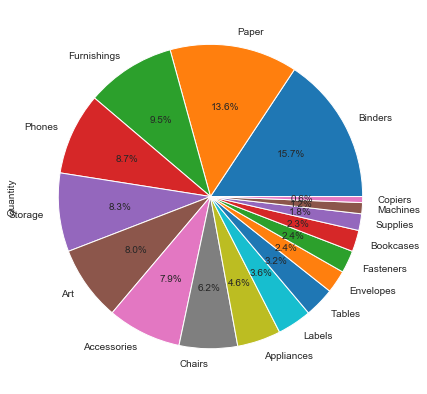

In [114]:
plt.figure(figsize=(11,7))
df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.show()

So From Above Analysis We Can Make Sure Where We Need Improvment And Where We Are Good.